# Tutorial 6: Adding Airbridges 

## Basic CPW Example

Let's start by creating a simple CPW and adding some airbridges to it.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

In [4]:
design = designs.DesignPlanar()
design.overwrite_enabled = True

gui = MetalGUI(design)

01:31PM 17s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 255 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



In [5]:
open_start_options = Dict(pos_x='1000um',
                         pos_y='0um',
                         orientation = '-90')

open_start_meander = OpenToGround(design,'Open_meander_start',options=open_start_options)





open_end_options = Dict(pos_x='1000um',
                        pos_y='1500um',
                        orientation='90',
                        termination_gap='10um')

open_end_meander = OpenToGround(design,'Open_meander_end',options=open_end_options)

meander_options = Dict(pin_inputs=Dict(start_pin=Dict(
                                            component='Open_meander_start',
                                            pin='open'),
                                        end_pin=Dict(
                                            component='Open_meander_end',
                                            pin='open')
                                        ),
                      total_length='9mm',
                      fillet='99.99um')

meander = RouteMeander(design,'meander',options=meander_options)

01:31PM 17s WARNING [check_lengths]: For path table, component=meander, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
01:31PM 17s WARNING [check_lengths]: For path table, component=meander, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.


01:31PM 20s WARNING [check_lengths]: For path table, component=meander, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
01:31PM 20s WARNING [check_lengths]: For path table, component=meander, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.


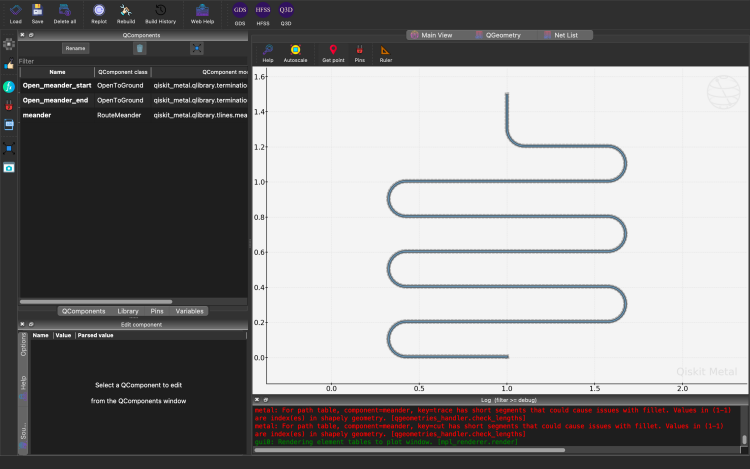

In [6]:
gui.rebuild()
gui.zoom_on_components(['meander'])
gui.screenshot()

First we need to calculate the `cross_over_length` and `pitch` for the airbridge design.

In [7]:
cpw_width = design.variables.cpw_width
cpw_gap = design.variables.cpw_gap

cpw_width, cpw_gap

('10 um', '6 um')

In [8]:
crossover_length = design.parse_value(cpw_width) + (2 * design.parse_value(cpw_gap))
crossover_length

0.022

We're going to make our `crossover_length` slightly longer than the entirety of the cpw width + gap. That way when we're on the turns of the meander, we can place our airbridges without having them intersect hte CPW.

In [9]:
from squadds.components.airbridge.airbridge_generator import AirbridgeGenerator

01:31PM 25s WARNING [check_lengths]: For path table, component=meander, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
01:31PM 25s WARNING [check_lengths]: For path table, component=meander, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.


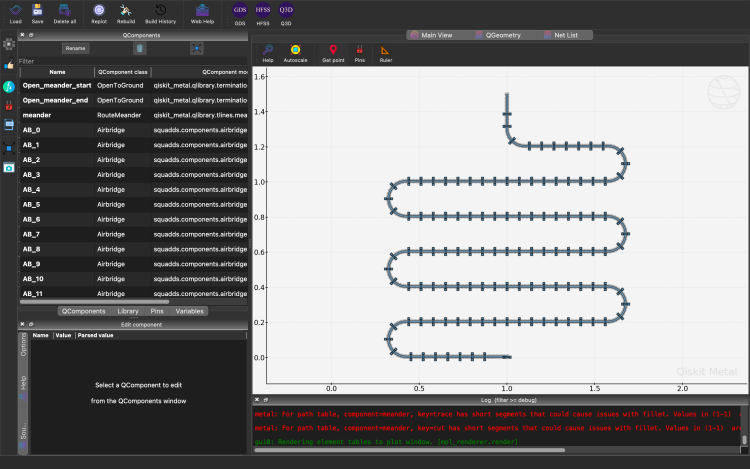

In [10]:
AirbridgeGenerator(
    design=design,
    target_comps=[meander],
    crossover_length=[crossover_length],
    min_spacing=0.005,
    pitch=0.070,
    add_curved_ab=True
)
gui.rebuild()
gui.zoom_on_components(['meander'])
gui.screenshot()

A high-level picture of what is happening on the backend.

1. You give `Airbridge_Generator()` a `target_cpw`. This is some cpw which you want to auto generate airbridges on.
2. You give it it's favorite options
    - `cross_over_length` (thickness of bridge)
    - `min_spacing` (minimum spacing between bridges. This should be at least as large as your CPW's gap)
    - `pitch` (spacing between the centers of each bridge)
    - `add_curved_ab` (if you want have airbridges on the turning points of your CPW) [default is True]

**Note: Adding airbridges to the turning points of your CPW sometimes causes issue with the airbridges being too close to each other. In which case you may want to either set `min_spacing` higher or set `add_curved_ab` to False.**

3. The generator then gets all the turning points of your CPW and calculates the directionality of them. It then uses a simplistic algorithm (I titled `find_ab_placement()`) to find where to place and their direction
4. Finally the generator calls the original `squadds.components.airbridge.airbridge.py` and makes the airbridges in the locations specificed previously.

## License

<div style='width: 100%; background-color:#3cb1c2;color:#324344;padding-left: 10px; padding-bottom: 10px; padding-right: 10px; padding-top: 5px'>
    <h3>This code is a part of SQuADDS</h3>
    <p>Developed by Sadman Ahmed Shanto</p>
    <p>This tutorial is written by Sadman Ahmed Shanto</p> 
    <p>&copy; Copyright Sadman Ahmed Shanto & Eli Levenson-Falk 2025.</p>
    <p>This code is licensed under the MIT License. You may<br> obtain a copy of this license in the LICENSE.txt file in the root directory<br> of this source tree.</p>
    <p>Any modifications or derivative works of this code must retain this<br>copyright notice, and modified files need to carry a notice indicating<br>that they have been altered from the originals.</p>
</div>